In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.dtypes

CustomerID                int64
Gender                     int8
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

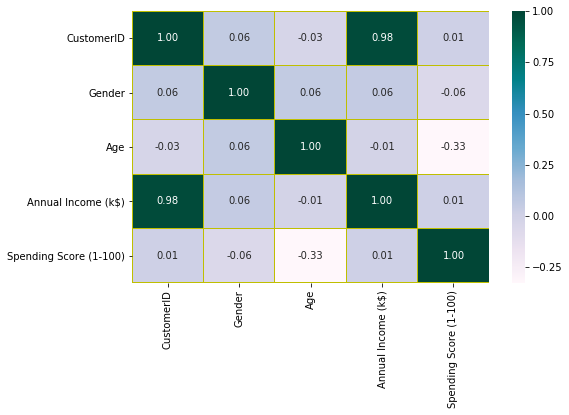

In [10]:
fig,ax = plt.subplots(figsize = (8,5))
sns.heatmap(df.corr(), ax = ax, annot = True, linewidths= 0.05, fmt = '.2f',cmap='PuBuGn',linecolor='y')
plt.show()

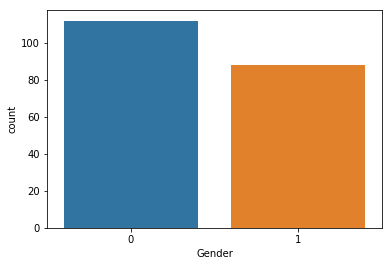

In [20]:
sns.countplot(data=df, x='Gender')

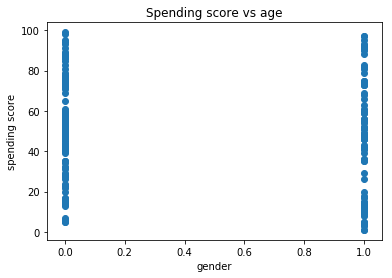

In [11]:
plt.scatter(df['Gender'],df['Spending Score (1-100)'])
plt.ylabel('spending score')
plt.xlabel('gender')
plt.title('Spending score vs age')
plt.show()

Text(0.5,0,'Age')

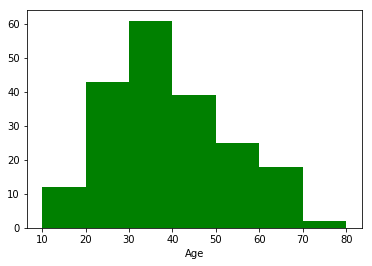

In [21]:
plt.hist(data=df,x='Age',bins=[10,20,30,40,50,60,70,80],color='Green')
plt.xlabel('Age')

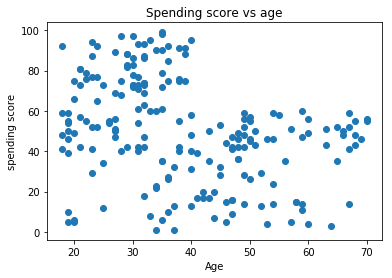

In [12]:
x = df['Age']
y= df['Spending Score (1-100)']
plt.scatter(x,y)
plt.ylabel('spending score')
plt.xlabel('Age')
plt.title('Spending score vs age')
plt.show()

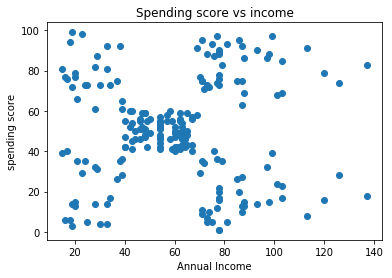

In [13]:
x = df['Annual Income (k$)']
y= df['Spending Score (1-100)']
plt.scatter(x,y)
plt.ylabel('spending score')
plt.xlabel('Annual Income')
plt.title('Spending score vs income')
plt.show()

In [14]:
Customer_id = df['CustomerID']
df.drop(['CustomerID'],axis =1,inplace = True)

# Unsupervised learning
# K-Means Clustering

In [15]:
x = df

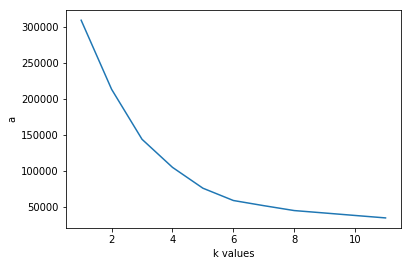

In [16]:
# find n_clusters value using elbow method

from sklearn.cluster import KMeans

a = []
for k in range (1,12):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    a.append(kmeans.inertia_)

plt.plot(range(1,12),a)
plt.xlabel('k values')
plt.ylabel('a')
plt.show()

In [17]:
#n_clusters= 5

kmeans = KMeans(n_clusters= 5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
clusters_knn = kmeans.fit_predict(x)

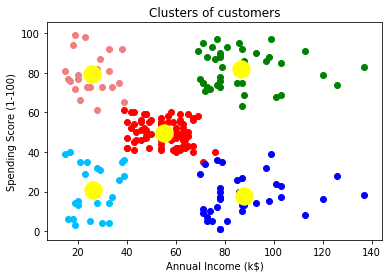

In [19]:
plt.scatter(x[clusters_knn == 0]['Annual Income (k$)'],x[clusters_knn == 0]['Spending Score (1-100)'], color = 'Red')
plt.scatter(x[clusters_knn == 1]['Annual Income (k$)'],x[clusters_knn == 1]['Spending Score (1-100)'], color = 'Blue')
plt.scatter(x[clusters_knn == 2]['Annual Income (k$)'],x[clusters_knn == 2]['Spending Score (1-100)'], color = 'Green')
plt.scatter(x[clusters_knn == 3]['Annual Income (k$)'],x[clusters_knn == 3]['Spending Score (1-100)'], color = 'lightcoral')
plt.scatter(x[clusters_knn == 4]['Annual Income (k$)'],x[clusters_knn == 4]['Spending Score (1-100)'], color = 'deepskyblue')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Interpretation

In [ ]:
#"Red" cluster indicates Low Annual income but Spending High.
#"Blue" cluster indicates High Annual income but Spending Low.
#"Green" cluster indicates High Annual income and High Spending.
#"lightcoral" indicates Spending is proportional to Annual income
#"deepskyblue" indicates Low Annual income and Low Spending